# Create Dataset

### Create

In [ ]:
import pandas as pd
import os

In [ ]:
dataPath = os.getcwd() + '/court case data/testdata/'
caseCount = len(os.listdir(dataPath))
data = []
try:
    os.remove(dataPath + ".DS_Store")
except:
    print("No file DS_Store")
for filename in os.listdir(dataPath):
    f = open(os.path.join(dataPath, filename), encoding='utf-8')
    data.append([filename.replace('.txt', ''), f.read()])

verdict_df = pd.DataFrame(data, columns=["id", "case text"])
cases_df = pd.read_csv('./court case data/testdata.csv')
merged_df = cases_df.join(verdict_df.set_index('id'), on='id', how='left')

merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])

In [ ]:
def add_inhoudsindicatie_to_case_text(df):
    for index, row in df.iterrows():
        fulltext = row['case text'] + row['inhoudsindicatie']
        df.at[index,'case text']= fulltext
    return df

merged_df = add_inhoudsindicatie_to_case_text(merged_df)

In [ ]:
merged_df.to_pickle("merged_df.pkl")

In [ ]:
merged_df

### Load

In [42]:
import pandas as pd
import os

In [43]:
merged_df = pd.read_pickle("merged_df.pkl")
merged_df

,id,verdict_date,publication_date,verdict_type,jurisdiction_type,inhoudsindicatie,case text
0,ECLI-NL-RBNNE-2021-5018,2021-01-10,2021-11-23,uitspraak,['Strafrecht'],"Productie synthetische drugs, medeplegen, prod...",\n\nRECHTBANK NOORD-NEDERLAND\nAfdeling strafr...
1,ECLI-NL-RBZUT-2003-AH9598,2003-03-06,2003-09-07,uitspraak,['Strafrecht'],Leveren grondstoffen synthetische drugs en sto...,\n\nRECHTBANK ZUTPHEN\nMeervoudige economische...
2,ECLI-NL-RBZWB-2020-2646,2020-06-23,2020-06-23,uitspraak,['Strafrecht'],plegen van voorbereidingshandelingen ten behoe...,\n\nRECHTBANK ZEELAND-WEST-BRABANT\n\nStrafrec...
3,ECLI-NL-GHAMS-2019-1601,2019-08-05,2019-07-26,uitspraak,['Strafrecht'],medeplegen witwassen - medeplegen voorhanden h...,\n\nafdeling strafrecht\nparketnummer: 23-0017...
4,ECLI-NL-GHAMS-2019-1602,2019-08-05,2019-07-26,uitspraak,['Strafrecht'],medeplegen witwassen - medeplegen voorhanden h...,\n\nafdeling strafrecht\nparketnummer: 23-0017...
...,...,...,...,...,...,...,...
18457,ECLI-NL-RBAMS-2013-1294,2013-01-29,2013-08-10,uitspraak,['Strafrecht'],De rechtbank acht bewezen dat er sprake is van...,\n\nRECHTBANK AMSTERDAM\n\n\nVONNIS\n\n \n\n13...
18458,ECLI-NL-PHR-2020-1106,2020-11-24,2020-11-24,conclusie,['Strafrecht'],Conclusie AG. Vervolging van een politieagent ...,\n\nPROCUREUR-GENERAAL\n\n\nBIJ DE\n\n\nHOGE R...
18459,ECLI-NL-GHAMS-2017-2618,2017-06-29,2017-05-07,uitspraak,['Strafrecht'],Liquidatieproces Passage\n\n ...,\n\n\nparketnummer: 23-001217-13\ndatum uitspr...
18460,ECLI-NL-RBAMS-2013-BZ0392,2013-01-29,2013-01-02,uitspraak,['Strafrecht'],De rechtbank acht bewezen dat verdachte zich s...,\nRECHTBANK AMSTERDAM \nVONNIS \n\n13/529144-...


# Word2Vec

### Load model

In [3]:
from gensim.models import Word2Vec
dutch_word2vec_model = Word2Vec.load("word2vec_dutch_court_cases.model")

In [ ]:
sims = dutch_word2vec_model.wv.most_similar('xtc', topn=100)
print([i[0] for i in sims])

## Create lists

In [5]:
def create_word2vec_relevant_words(words, matches):
    word2vec_list = []
    for word in words:
        results = dutch_word2vec_model.wv.most_similar(word, topn=100)
        for i in results:
            word2vec_list.append(i[0])
            
    word2vec_list = list(set([i for i in word2vec_list if word2vec_list.count(i)>matches]))
    return word2vec_list

### Drugs

In [9]:
list_of_drugs = ['xtc', 'mdma', 'cocaine', 'wiet', 'speed', 'bmk', 'pmk']
word2vec_drug_list = create_word2vec_relevant_words(list_of_drugs, 2)

print(len(word2vec_drug_list))
print(word2vec_drug_list)

80
['amfetamine', 'mdma;', 'hasjiesj', '(mdma)', 'xtc-tabletten', 'opium', 'harddrugs', 'methamfetamine', 'fenacetine', 'ecstasy', 'pil', 'cocaïne;', 'methadon', 'paracetamol', 'weed', 'morfine', 'hash', 'mdma-pillen', 'heroine', 'hasj', 'kristallen', '34-methyleendioxymethamfetamine', 'mdma-hcl', 'hennep', 'crystal', 'cocaïne', 'heroïne', 'inositol', 'marihuana', 'temazepam', '(hard)drugs', 'pillen)', 'coke', 'mdma-poeder', 'pillen', 'lidocaïne', 'gbl', 'mdma', 'mdma-kristallen', 'hashish', 'xtc-pillen', 'speed', 'cafeïne', 'ketamine', 'mdma)', 'amfetaminepasta', 'amfetaminesulfaat', 'xtc', 'pep', 'xtc/mdma', 'wiet', 'methanol', 'amfetaminen', 'coffeïne', 'ghb', 'amfetaminebase', 'metamfetamine', 'cocaïne?', 'tabletten', 'heroïne;', 'manitol', 'mdma/xtc', 'amfetamineolie', '2c-b', 'amfetamine;', 'apaan', 'cocaine', 'drugs', 'diazepam', 'lsd', 'mapa', '(xtc)', 'meth', 'amfetamine)', 'n-formylamfetamine', 'crack', 'olie', 'speed/amfetamine', '(met)amfetamine', 'cannabis']


Add custom drugs list

In [11]:
my_file = open("drugs list.txt", "r", encoding='utf-8')
my_file = my_file.readlines()
drugs_list = []
for i in my_file:
    drugs_list.append(i.replace('\n', ''))
drugs_list = list(set(drugs_list + word2vec_drug_list))
print(len(drugs_list))

120


Todo: add opiumwet scraper

### Smuggle words

In [13]:
list_of_smuggle_words = ['smokkel', 'invoer', 'uitvoer', 'import', 'export', 'transport']
word2vec_smuggle_list = create_word2vec_relevant_words(list_of_smuggle_words, 3)

word2vec_smuggle_list = list(set(word2vec_smuggle_list + list_of_smuggle_words ))
print(len(word2vec_smuggle_list))
print(word2vec_smuggle_list)

38
['verkoop', 'invoeren', 'aanvoer', 'leverantie', 'transporteren', 'produktie', 'invoer', 'terugwinnen/bewerken', 'resten)', 'levering', 'in-/uitvoer', '(invoer', 'transport', 'terugwinnen', 'hennephandel', 'cocaïnehandel', 'productie', 'handel', 'importeren', 'productie/verwerking', 'fabricage', 'uitvoer', 'export', 'aankoop', 'exporteren', 'vervaardiging', 'uithalen', 'doorvoer', 'straatverkoop', 'kweek', 'bewerking', 'import', 'ladingen', 'versnijding', 'bronland', 'smokkel', 'organisatoren', 'bewerken/verwerken']


### Quantities

In [17]:
list_of_quantity_words = ['tabletten', 'kilo', 'gram', 'pakketten', 'milligram']
word2vec_quantity_list = create_word2vec_relevant_words(list_of_quantity_words, 2)

word2vec_quantity_list = list(set(word2vec_quantity_list + list_of_quantity_words))
print(len(word2vec_quantity_list))
print(word2vec_quantity_list)

53
['kilo', 'cm)', 'mdma-pillen', 'blokken', 'mg', 'bolletjes', 'km/uur', 'ton', 'db(a)', 'xtc-pillen', 'litervat', 'meter)', 'kilogram;', 'kg)', 'pakjes', 'gram;', 'ml', 'liter)', 'zakjes', 'gripzakjes', 'tabletten', 'milligram', 'wikkels', 'liter', 'gram”', 'pakketten', 'gram10', 'km', 'gr', 'bolletjes)', 'ponypacks', 'pillen', 'liter;', 'mg/l', 'kilogram)', 'm²', 'milliliter', 'gram:', '%', 'µg', 'ampullen', 'kilo;', 'mg/ml', 'kilo)', 'gram)', 'stuks', 'gram', 'ng/ml', 'mg/m2', 'planten)', 'drums', 'bollen', 'km/u']


### Countries

In [36]:
list_of_countries = ['duitsland', 'colombia', 'alicante', 'belgie']
word2vec_country_list = create_word2vec_relevant_words(list_of_countries, 1)

word2vec_country_list = list(set(word2vec_country_list + list_of_countries))
print(len(word2vec_country_list))
print(word2vec_country_list)

100
['peru', 'denemarken', 'bulgarije', 'venezuela', 'spanje', 'afrika', 'thailand', 'zwitserland', 'groot-brittannië', 'singapore', 'algeciras', 'chili', 'amerika', 'portugal', 'lissabon', 'domingo', 'natal', 'sydney', 'guayaquil', 'panama', 'tanger', 'janeiro', 'brussel', 'alicante', 'karachi', 'engeland', 'kinshasa', 'bogota', '(zwitserland)', 'zweden', 'boedapest', 'nigeria', 'jamaica', 'bosnië', 'marokko', 'congo', 'rabat', 'oostenrijk', 'pakistan', 'turkije', 'dubai', 'göteborg', 'china', 'londen', 'ghana', 'slowakije', 'syrië', 'griekenland', 'noorwegen', 'roemenië', 'argentinië', 'bremen', 'belgië', 'italië', 'antwerpen', 'ecuador', 'zuid-afrika', 'oekraïne', 'curaçao', 'belgie', 'mexico', 'australië', 'brazilië', 'aires', 'servië', '[land]', 'paramaribo', 'polen', 'frankrijk', 'finland', 'caracas', 'kroatië', 'barcelona', 'sao', 'trinidad', 'lübeck', 'santa', 'frankfurt', 'berlijn', 'buenos', 'tsjechië', 'villajoyosa', 'duitsland', 'zuid-amerika', 'colombia', 'canada', 'luxemb

# Create SpaCy model

In [37]:
import spacy
from spacy import displacy
# !python -m spacy download nl_core_news_md
nlp = spacy.load('nl_core_news_md')

The following imports a list of countries consisting of multiple words. SpaCy has trouble identifying such countries.

In [38]:
my_file = open("countries list.txt", "r", encoding='utf-8')
my_file = my_file.readlines()
countries_list = []
for i in my_file:
    countries_list.append(i.replace('\n', ''))
countries_list = list(set(countries_list))


The following imports a list of terms not to classify as countries.

In [148]:
countries_to_exclude = open("countries_to_exclude.pkl", "rb")
countries_to_exclude = pickle.load(countries_to_exclude)

my_file = open("countries_to_exclude.txt", "r", encoding='utf-8')
my_file = my_file.readlines()
for i in my_file:
    countries_to_exclude.append(i.replace('\n', ''))


In [40]:
def configure_spacy_model():
    # Create dict of drug pattern and quantity pattern
    pattern_list = []

    for i in drugs_list:
        pattern_list.append({"label": "DRUG", "pattern": [{"lower": i.lower()}]})
    
    for i in word2vec_quantity_list:
        pattern_list.append({"label": "QUANTITY", "pattern": [{"IS_DIGIT": True}, {"LOWER": i}]})
        pattern_list.append({"label": "QUANTITY", "pattern": [{"ENT_TYPE": "CARDINAL"}, {"LOWER": i}]})
    
    for i in word2vec_country_list:
        pattern_list.append({"label": "GPE", "pattern": [{"lower": i.replace(' ', '').lower()}]})
        
    for i in countries_to_exclude:
        pattern_list.append({"label": "EXCL", "pattern": [{"lower": i.lower()}]})
    
    # Add drug and quantity rules to the model
    config = {
   "phrase_matcher_attr": None,
   "validate": True,
   "overwrite_ents": True,
   "ent_id_sep": "||",
    }
    ruler = nlp.add_pipe("entity_ruler", config=config)

    ruler.add_patterns(pattern_list)

In [41]:
configure_spacy_model()

# Select cases & chunks

Current rules to select a case:
1. Case needs to contain a smuggle word
2. Chunk needs to contain at least 1 country that is not "Netherlands"
3. Chunk needs to contain at least 1 drug

### Filter cases for concerning 'Strafrecht' and containing a smuggle word.

In [80]:
def filter_strafrecht_and_contain_smuggle_word(df):
    print(f"Original df contains {len(df)} cases.")
    return_df = pd.DataFrame()
    for index, row in df.iterrows():
        if any(word in row['case text'] for word in word2vec_smuggle_list) and 'Strafrecht' in row['jurisdiction_type']:
            return_df = return_df.append(row)
    print(f"Returning df contains {len(return_df)} cases. Filtered {len(df) - len(return_df)}")
    return return_df

### Split cases in chunks and keep if complies with rules

In [128]:
import pickle

In [129]:
tenlastelegging_words = ['tenlastelegging', 'telastelegging', 'tenlasteleggingen', 'telastlegging', 'strafmotivering']

def trim_by_tenlastelegging(doc):
    trimmed_doc = doc
    stop = False
    for keyword in tenlastelegging_words:
        if not stop and keyword in doc:
            keyword_index = doc.find(keyword)
            trimmed_doc = doc[keyword_index:]
            stop = True
    return trimmed_doc

In [130]:
import re
def split_text_in_chunks(doc):
    chunks = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])|\n', doc)
    chunks = [x for x in chunks if len(x) > 1]
    return chunks

In [131]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "geoapiExercises")

country_translation_dict = open("country_translation_dict.pkl", "rb")
country_translation_dict = pickle.load(country_translation_dict)


def replace_locations(loc):
    if "gemeente" in loc:
        return "nederland"
#     if "verenigd koninkrijk" in loc:
#         return "engeland"
#     if "sovjet" in loc:
#         return "rusland"
    else:
        return loc

def get_google_country(loc):
    loc = replace_locations(loc.lower())
    if loc in country_translation_dict:
        return country_translation_dict[loc]
    if loc in countries_to_exclude:
        return "None"
    else:
        try:
            location = geolocator.geocode(loc, language='en')
            country_name = location.raw['display_name'].split(',')[-1].strip()
            country_translation_dict[loc] = country_name
            return country_translation_dict[loc]
        except:
            print(f"{loc} is not a location.")
            countries_to_exclude.append(loc)
            return "None"
    

In [132]:
get_google_country('Ouagadougou')

'Burkina Faso'

In [133]:
def rule_enforcer(chunks):
    trafficking_related = []
    countries_mentioned = []
    for chunk in chunks:
        
         # Check if chunk contains a drug
        word_list = [x for x in chunk.lower().rstrip().replace('.', '').split(' ') if len(x)>0]
        if any(drug in word_list for drug in drugs_list):
            
            # SpaCy analysis to check for countries
            ents = nlp(chunk).ents
            if any(ent.label_ == "GPE" for ent in ents):
                for ent in ents:
                    if ent.label_ == "GPE":
                        google_country = get_google_country(ent.text)
                        if google_country != "Netherlands" and google_country != "None":
                            trafficking_related.append(chunk)
                            if google_country not in countries_mentioned:
                                countries_mentioned.append(google_country)
    
    return trafficking_related, countries_mentioned
         
def filter_for_relevant_chunks(df):
    return_df = pd.DataFrame(columns=['ecli', 'verdict_date', 'chunks', 'countries_mentioned'])
    for index, row in df.iterrows():
        doc = row['case text']
        chunks = split_text_in_chunks(doc)
        
        enforcer_return = rule_enforcer(chunks)
        compliant_chunks = enforcer_return[0]
        countries_mentioned = enforcer_return[1]
        
        if len(compliant_chunks) > 0:
            add = {'ecli': row['id'].replace('-', ':'), 'verdict_date': row['verdict_date'], 'chunks': compliant_chunks, 'countries_mentioned': countries_mentioned}
            return_df = return_df.append(add, ignore_index = True)
    return return_df


### Execute

In [138]:
relevant_df = filter_strafrecht_and_contain_smuggle_word(merged_df)

country_translation_dict = open("country_translation_dict.pkl", "rb")
country_translation_dict = pickle.load(country_translation_dict)

trafficking_df = filter_for_relevant_chunks(relevant_df)

dict_file = open("country_translation_dict.pkl", "wb")
pickle.dump(country_translation_dict, dict_file)
dict_file.close()

exclude_list_file = open("countries_to_exclude.pkl", "wb")
pickle.dump(countries_to_exclude, exclude_list_file)
exclude_list_file.close()

print(f"Lenght of the resutling trafficking df: {len(trafficking_df)}")

Original df contains 18462 cases.
Returning df contains 13574 cases. Filtered 4888
mmc-kleurreactietesten is not a location.
granuleermachines is not a location.
aangetroffen.62 is not a location.
mdma-grondstoffen is not a location.
mdma.99 is not a location.
omringd.1 is not a location.
enpseudoefedrine is not a location.
mdma.hc1 is not a location.
bevatten.90 is not a location.
opgeruimd.124 is not a location.
apparatuur.168 is not a location.
cateringboxen is not a location.
rijsburg is not a location.
fluoramfetamine is not a location.
gamma-hydroxy-boterzuur is not a location.
gev.straf is not a location.
797 e.v. is not a location.
bereid/vervaardigd is not a location.
aanwezig.18 is not a location.
bevatten.52 is not a location.
mdma.134 is not a location.
drugspakketjes is not a location.
vinkeveen/mijdrecht is not a location.
29-jarige pool is not a location.
amfetamine14 is not a location.
opgehaald.157 is not a location.
benzyl-methylketon is not a location.
methylester is

geldbiljet is not a location.
-verslagen is not a location.
pre-arrival is not a location.
binnengesmokkelde is not a location.
g2186304 is not a location.
opiumwetdan is not a location.
opzettelijkheeft is not a location.
methylalcohol is not a location.
bo4471 is not a location.
laboratoriumrapport is not a location.
herione is not a location.
florida and elsewhere is not a location.
million dollar fee is not a location.
verwerkingspanden is not a location.
geldtelmachines is not a location.
afghaan is not a location.
opgeknopt is not a location.
darknetmarkets is not a location.
aana1158nl is not a location.
oranje/roze/groen/blauw is not a location.
23-11-2017 is not a location.
dichtgebrand is not a location.
35-jarige rotterdammer is not a location.
dealerperiode is not a location.
zendingen7 is not a location.
rechtbank roermond is not a location.
mededader is not a location.
hashcake is not a location.
snowseals is not a location.
alpha-phenylacetoacetic is not a location.
aajd

2021volgt is not a location.
ruiken.12 is not a location.
norefedrine is not a location.
inbeslaggenomen.4 is not a location.
tweefasen is not a location.
regiopolitie brabant is not a location.
contanten.65 is not a location.
e.v.)voorhanden is not a location.
hydroxy is not a location.
gestuurd.10 is not a location.
gezeten.9 is not a location.
onderzoek.(eindnoot is not a location.
huiszoekingen is not a location.
metamfetaminetatraat is not a location.
aapp9828nl is not a location.
herkenningsgedrag is not a location.
ethylcocaïne is not a location.
hydroxycocaïne is not a location.
femoraalbloed is not a location.
verwurging/asfyxie is not a location.
rotterdamtezamen is not a location.
aaei5033 is not a location.
criminali-teit is not a location.
negenhonderdvierenzestig is not a location.
tetramisol is not a location.
auto's/bestel-/vrachtauto's is not a location.
oplosmiddel.29 is not a location.
whatsapp-gesprekken is not a location.
verdachte.68 is not a location.
dossierpagi

kinderverkrachter is not a location.
toebehoren.35 is not a location.
c.01.01.001 is not a location.
contactverboden is not a location.
kleerkastc-017 is not a location.
drugslaboratorium is not a location.
s)/mengmolen is not a location.
antwerpse is not a location.
hr:1998:av1127 is not a location.
softdrugsgebruik is not a location.
art. 36e sr is not a location.
pormis-vonnis is not a location.
maastrichttezamen is not a location.
nederexhaven is not a location.
mephedrone-4-methylmethcathinone is not a location.
hashies is not a location.
henneptoppen is not a location.
persoonsdossier is not a location.
gekregen.8 is not a location.
deliriumsyndroom is not a location.
politie42 is not a location.
stalkerige is not a location.
ty-wraps is not a location.
boliviaans is not a location.
onregelmatigheden/afwijkingen is not a location.
aangeefster is not a location.
2-fenylethylamine is not a location.
harddrugsmisbruik is not a location.
amfetaminepasta.34 is not a location.
bevat.36

In [146]:
print(f"Lenght of the resutling trafficking df: {len(trafficking_df)}")

Lenght of the resutling trafficking df: 2824


# Rule-based NER & POS tagging model

## Tagging

In [149]:
# Get linguistic distance between token a and token b. After iter 10 it is deemed a too far distance.
def get_linguistic_distance(a, b):
    tokens_to_consider = [b]
    found = False
    iters = 0
    while not found:
        for token in tokens_to_consider:
            tokens_to_add = []
            for ancestor in token.ancestors:
                if ancestor not in tokens_to_add and ancestor not in tokens_to_consider:
                    tokens_to_add.append(ancestor)
            for child in token.children:
                if child not in tokens_to_add and child not in tokens_to_consider:
                    tokens_to_add.append(child)
            tokens_to_consider = tokens_to_consider + tokens_to_add
        for x in tokens_to_consider:
            if a.orth == x.orth:
                found = True
        iters += 1
        if iters == 10:
            found = True
    return iters

In [150]:
def get_adposition_from_loc(token):
    for child in token.children:
        if child.pos_ == "ADP" and child.dep_ == "case":
            return child.text

In [151]:
def extract_chunk_info_without_log(txt):
    result = {}
    for token in nlp(txt):
        if token.ent_type_ == "DRUG":
            drug_info = extract_info_from_drug_without_log(token, txt)
            result[token.text] = drug_info
    return result
            
adj_list = []          
def extract_info_from_drug_without_log(drug, txt):
    volumes = []
    locations = {}
    irrelevant_locations = []
    for token in nlp(txt):
        
        # Extract countries
        if token.ent_type_ == "GPE":
            dist = get_linguistic_distance(drug, token)
            adj = get_adposition_from_loc(token)
            locs = [token.text]
            for loc in token.conjuncts:
                locs.append(loc.text)
            if adj not in locations:
                locations[adj] = locs
                if adj not in adj_list:
                    adj_list.append(adj)
            else:
                for loc in locs:
                    if loc not in locations[adj]:
                        locations[adj].append(loc)
        
        # Extract volume
        if token.ent_type_ == "QUANTITY":
            volume = {}
            dist = get_linguistic_distance(drug, token)
            second_token = ""
            quantity = {}
            for ancestor in token.ancestors:
                if ancestor.ent_type_ == "QUANTITY":
                    second_token = ancestor
            for child in token.children:
                if child.ent_type_ == "QUANTITY":
                    second_token = child

            ## Decide volume and volume_type
            if not isinstance(second_token, str):
                if nlp(token.text)[0].ent_type_ == "CARDINAL":
                    volume['volume'] = token.text
                    volume['volume_type'] = second_token.text
                    volume['dist'] = dist
                elif nlp(second_token.text)[0].ent_type_ == "CARDINAL":
                    volume['volume'] = second_token.text
                    volume['volume_type'] = token.text
                    volume['dist'] = dist

                #Only append when not already in volumes
                if volume not in volumes:
                    volumes.append(volume)
                
        
        
            

    result = {}
    if bool(locations):
        result['locations'] = locations
    result["volume"] = volumes
    if len(irrelevant_locations) > 0:
        result["irrelevant_locations"] = irrelevant_locations
    
    return result

## Fusing

In [200]:
def fuse_chunks(chunks): 
    # Loop through chunks
    drug_dict = {}
    for chunk in chunks:
        chunk_info = extract_chunk_info_without_log(chunk)

        # Loop through drugs
        if chunk_info is not None:
            for drug in chunk_info:
                lowerdrug = drug.lower()
                if lowerdrug not in drug_dict:
                    drug_dict[lowerdrug] = {'locations': [], 'volumes': []}
                if len(chunk_info[drug]['volume']) > 0:
                    drug_dict[lowerdrug]['volumes'].append(chunk_info[drug]['volume'])
                if 'locations' in chunk_info[drug]:
                    drug_dict[lowerdrug]['locations'].append(chunk_info[drug]['locations'])
    return drug_dict

In [201]:
def fuse_locations(fused_chunks):
    for drug in fused_chunks:
        adjectives = {}
        for location_entry in fused_chunks[drug]['locations']:
            for adjective in location_entry:
                if adjective not in adjectives:
                    adjectives[adjective] = []
                for country in location_entry[adjective]:
                    if country not in adjectives[adjective]:
                        adjectives[adjective].append(country)
        fused_chunks[drug]['locations'] = adjectives
    return fused_chunks

In [202]:
def fuse_volumes(fused_locations):
    for drug in fused_locations:
        final_volume = {}
        dist = 100
        for volumes in fused_locations[drug]['volumes']:
            if len(volumes) > 0:
                for volume in volumes:
                    if 'dist' in volume:
                        if volume['dist'] < dist:
                            dist = volume['dist']
                            final_volume = volume
        fused_locations[drug]['volumes'] = final_volume
        return fused_locations

In [160]:
def translate_locations(data):
    geolocator = Nominatim(user_agent = "geoapiExercises")
    if data is not None:
        for drug in data:
            if 'locations' in data[drug]:
                data[drug]['original_locations'] = data[drug]['locations'].copy()
                for adjective in data[drug]['locations']:
                    country_list = []
                    locations = data[drug]['locations'][adjective]
                    for loc in locations:
                        if loc not in country_translation_dict and loc not in countries_to_exclude:    
                            try:
                                location = geolocator.geocode(loc, language='en')
                                country_name = location.raw['display_name'].split(',')[-1]
                                country_translation_dict[loc] = country_name
                                if country_name not in country_list:
                                    country_list.append(country_name)
                            except Exception as e:
                                print(f"{loc} is not a location.")
                                countries_to_exclude.append(loc)
                        else:
                            if loc in country_translation_dict:
                                if country_translation_dict[loc] not in country_list:
                                    country_list.append(country_translation_dict[loc])
                    data[drug]['locations'][adjective] = country_list
    return data

In [161]:
def get_location_directions(data):
    from_adjectives = ['uit', 'vanuit', 'van']
    to_adjectives = ['naar']
    via_adjectives = ['via']
    if data is not None:
        for drug in data:
            fromlocs = []
            tolocs = []
            vialocs = []
            locations = data[drug]['locations']
            for adj in locations:
                if adj in from_adjectives:
                    for loc in locations[adj]:
                        if loc not in fromlocs:
                            fromlocs.append(loc)
                elif adj in to_adjectives:
                    for loc in locations[adj]:
                        if loc not in tolocs:
                            tolocs.append(loc)
                elif adj in via_adjectives:
                    for loc in locations[adj]:
                        if loc not in vialocs:
                            vialocs.append(loc)

            data[drug]['locations'] = {'from': fromlocs, 'to': tolocs, 'via': vialocs}
    return data

## Results

In [207]:
final_df = pd.DataFrame(columns=['ecli', 'drug', 'relevant_countries'])    

    
                            
for index, row in trafficking_df.iterrows():
    id = row['ecli']
#     print(id)
    
    fused_chunks = fuse_chunks(row['chunks'])
    fused_locations = fuse_locations(fused_chunks)
    fused_volumes = fuse_volumes(fused_locations)
    translated_locations = translate_locations(fused_volumes)
#     location_directions = get_location_directions(translated_locations)
    
#     print(location_directions)
    if translated_locations is not None:
        for drug in translated_locations:
            relevant_countries = []
            
            curr = translated_locations[drug]
            for adjective in curr['locations']:
                locs = curr['locations'][adjective]
                for loc in locs:
                    if loc not in relevant_countries:
                        relevant_countries.append(loc)
            
            
            row = {'ecli': id, 'drug': drug, 'relevant_countries': relevant_countries}
            final_df = final_df.append(row, ignore_index=True)
        
final_df

,ecli,drug,relevant_countries
0,ECLI:NL:RBZWB:2020:2646,bmk,"[ Spain, United Kingdom]"
1,ECLI:NL:RBAMS:2019:4296,heroïne,"[ Netherlands, Netherlands, Peru]"
2,ECLI:NL:RBAMS:2019:4296,cocaïne,"[ Netherlands, Netherlands, Peru]"
3,ECLI:NL:RBDHA:2019:9384,drugs,[Belgium]
4,ECLI:NL:GHAMS:2018:2662,cocaïne,[Argentina]
...,...,...,...
5723,ECLI:NL:RBNHO:2013:10924,cocaïne,"[South America, Nepal]"
5724,ECLI:NL:GHSHE:2021:3205,cocaïne,"[ Netherlands, Belgium, Dominican Republic, B..."
5725,ECLI:NL:GHSHE:2021:3205,hasjiesj,[ Belgium]
5726,ECLI:NL:RBLIM:2018:3094,cocaïne,"[Netherlands, Dominican Republic, Belgium, Ne..."


In [ ]:
dict_file = open("country_translation_dict.pkl", "wb")
pickle.dump(country_translation_dict, dict_file)
dict_file.close()

exclude_list_file = open("countries_to_exclude.pkl", "wb")
pickle.dump(countries_to_exclude, exclude_list_file)
exclude_list_file.close()

In [ ]:
final_df_filtered = pd.DataFrame(columns=["ecli", "drug", "relevant_countries"])

for index, row in final_df.iterrows():
    if any(loc != "Netherlands" for loc in row['relevant_countries']):
        final_df_filtered = final_df_filtered.append(row)
        

In [229]:
date_list = []
for index, row in final_df_filtered.iterrows():
    ecli = row['ecli']
    case = merged_df[merged_df['id'] == ecli.replace(':', '-')]
    date = case['verdict_date'].iloc[0]
    date_list.append(date)
    
final_df_filtered['verdict_date'] = date_list

In [231]:
drug_dict = {}
for index, row in final_df_filtered.iterrows():
    drug = row['drug']
    if drug not in drug_dict:
        drug_dict[drug] = 0
    drug_dict[drug] = drug_dict[drug] + 1
    
print(drug_dict)

{'bmk': 65, 'heroïne': 308, 'cocaïne': 1110, 'drugs': 1233, 'hennep': 334, 'hasjiesj': 123, 'diacetylmorfine': 18, 'cocaine': 69, 'hash': 41, 'hasj': 122, 'mdma': 259, '4-fa': 3, 'fentanyl': 3, 'amfetamine': 279, 'wiet': 54, 'olie': 27, 'xtc-pillen': 95, 'harddrugs': 246, 'heroine': 19, 'cocaïnetransport': 31, 'methanol': 19, 'aceton': 31, 'tenamfetamine': 29, 'xtc-tabletten': 26, 'speed': 61, 'methamfetamine': 34, 'marihuana': 67, 'tabletten': 38, 'pmk': 33, '2c-b': 9, 'metamfetamine': 27, 'isosafrol': 1, 'kristallen': 14, 'cocaïnetransporten': 44, 'pillen': 124, 'xtc': 119, 'cafeïne': 13, 'apaan': 48, '34-methyleendioxymethamfetamine': 11, 'pep': 11, 'crystal': 15, 'pil': 8, 'lsd': 27, 'cannabis': 55, 'meth': 12, 'benzylmethylketon': 27, 'piperonylmethylketon': 7, 'formamide': 28, 'coke': 31, 'coffeïne': 4, 'paracetamol': 11, 'mdea': 37, 'weed': 45, 'mierenzuur': 16, 'hashish': 48, 'ketamine': 13, 'diamorfine': 8, 'ghb': 21, 'opium': 2, 'mdma-pillen': 6, 'diazepam': 3, 'temazepam': 1

## Visualizations

In [174]:
vectorcounts = {}

for index, row in final_df_filtered.iterrows():
    locs = row['relevant_countries']
    for loc in locs:
        loc = loc.strip()
        if loc != "Netherlands":
            if loc not in vectorcounts:
                vectorcounts[loc] = [0]
            vectorcounts[loc][0] = vectorcounts[loc][0] + 1
            
print(vectorcounts)

{'Spain': [539], 'United Kingdom': [1008], 'Peru': [83], 'Belgium': [1792], 'Argentina': [78], 'Colombia': [188], 'Norway': [194], 'Jamaica': [5], 'Morocco': [251], 'Egypt': [13], 'Germany': [1484], 'France': [873], 'Suriname': [209], 'Ecuador': [112], 'South America': [232], 'United States': [460], 'Europe': [160], 'South Africa': [55], 'Uzbekistan': [4], 'Croatia': [18], 'Saudi Arabia': [7], 'Sweden': [210], 'Dominican Republic': [108], 'Turkey': [179], 'Russia': [40], 'Greece': [46], 'Kazakhstan': [2], 'Panama': [60], 'Brazil': [160], 'Portugal': [106], 'Kenya': [28], 'Italy': [336], 'Paraguay': [15], 'Somalia': [2], 'Nigeria': [17], 'Congo-Brazzaville': [2], 'Poland': [230], 'Czechia': [57], 'Afghanistan': [8], 'China': [94], 'Haiti': [14], 'Japan': [42], 'Finland': [73], 'Myanmar': [1], 'Denmark': [116], 'Belarus': [8], 'Nepal': [3], 'Philippines': [31], 'Bosnia and Herzegovina': [7], 'Dominica': [1], 'Lithuania': [14], 'Albania': [8], 'Greenland': [1], 'South Korea': [18], 'Roman

In [181]:
import plotly.express as px
import numpy as np
import pandas as pd

np.random.seed(12)
gapminder = px.data.gapminder().query("year==2007")
#gapminder['counts'] = np.nan

d = vectorcounts

yourdata = pd.DataFrame(d).T.reset_index()
yourdata.columns=['country', 'count']

df=pd.merge(gapminder, yourdata, how='left', on='country')

fig = px.choropleth(df, locations="iso_alpha",
                    color="count", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [180]:
keys = [k for k, v in country_translation_dict.items() if v == 'Afghanistan']
print(keys)

['afghanistan', 'kabul', 'afganistan', 'Afghanistan', 'Afganistan']


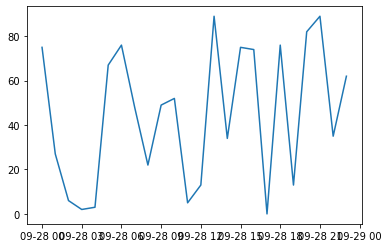

In [232]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(x,y)
plt.show()

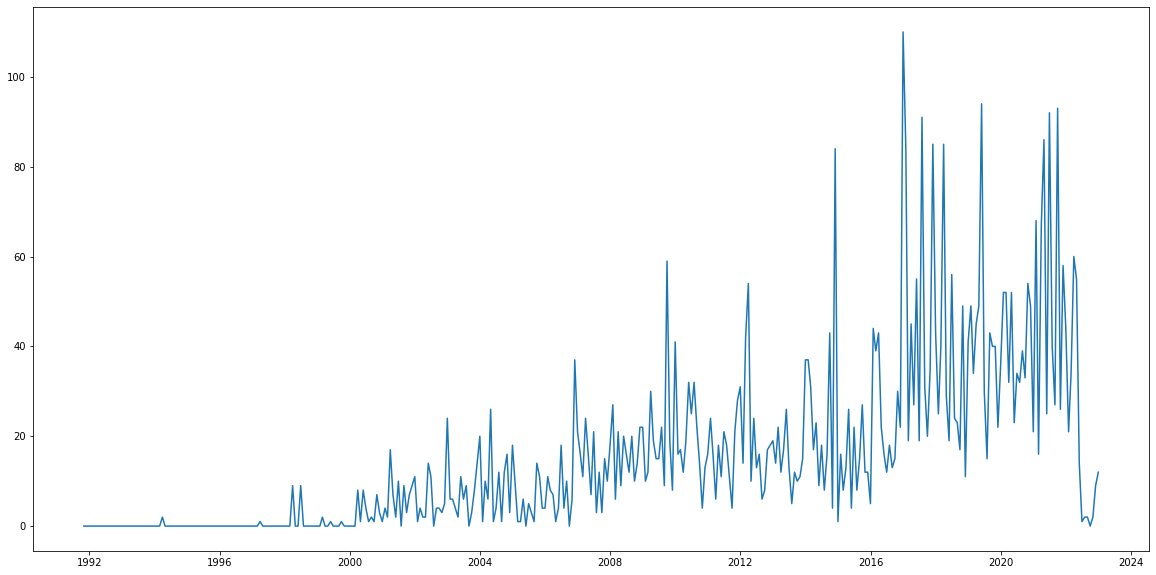

In [238]:
plt.rcParams["figure.figsize"] = (20,10)

final_df_filtered_plot = final_df_filtered["verdict_date"].value_counts().resample("1M").sum()[150:]
plt.plot(final_df_filtered_plot)